In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load the diabetes dataset
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

# Format dataset into a data frame
Xcolumns = "AGE SEX BMI ABP S1 S2 S3 S4 S5 S6".split()
diabetes_X = pd.DataFrame(diabetes.data, columns=Xcolumns)

Ycolumns = "TARG".split()
diabetes_Y = pd.DataFrame(diabetes.target, columns=Ycolumns)
diabetes_ = pd.concat([diabetes_X, diabetes_Y], axis=1)

print(diabetes_X.shape)
print(diabetes_Y.shape)
print(diabetes_.shape)

(442, 10)
(442, 1)
(442, 11)


In [2]:
# Split the data into test/training sets for cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.20)

print(len(X_train), "+", len(Y_train), "and", len(X_test), "+", len(Y_test))

353 + 353 and 89 + 89


In [3]:
# Function to print scores for each model
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = [] #to store rmse values for different K
K = 0
for K in range(30):
    K = K+1
    # K Nearest Neighbor Regressor model
    knn_diabetes = KNeighborsRegressor(n_neighbors = K)
    knn_predict = cross_val_predict(knn_diabetes, X_train, Y_train)
    #Store RMSE (pred vs data) score for each K
    error = sqrt(mean_squared_error(Y_train,knn_predict)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 80.19432842548612
RMSE value for k=  2 is: 69.55017855556147
RMSE value for k=  3 is: 65.11423341434791
RMSE value for k=  4 is: 63.944681353268976
RMSE value for k=  5 is: 62.951573635846955
RMSE value for k=  6 is: 61.88391345170574
RMSE value for k=  7 is: 60.540864042376484
RMSE value for k=  8 is: 59.92657216119992
RMSE value for k=  9 is: 60.62813697368871
RMSE value for k=  10 is: 60.47288578374745
RMSE value for k=  11 is: 59.333087988299845
RMSE value for k=  12 is: 59.83487024600284
RMSE value for k=  13 is: 59.60819546273945
RMSE value for k=  14 is: 59.086968360445844
RMSE value for k=  15 is: 58.91362359964409
RMSE value for k=  16 is: 59.001558859555985
RMSE value for k=  17 is: 59.05571714272495
RMSE value for k=  18 is: 59.13736345825387
RMSE value for k=  19 is: 59.40671049015799
RMSE value for k=  20 is: 59.574192441854805
RMSE value for k=  21 is: 59.61596783193176
RMSE value for k=  22 is: 59.45621752400338
RMSE value for k=  23 is: 59.40694

Text(0,0.5,'Cross-Validated RMSE')

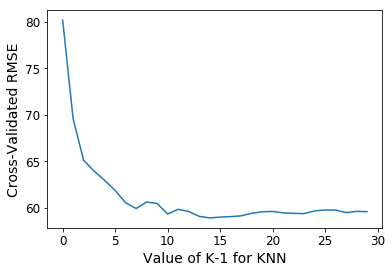

In [5]:
plt.plot(rmse_val)
plt.xlabel('Value of K-1 for KNN')
plt.ylabel('Cross-Validated RMSE')

In [6]:
# Find correlations of each attribute to the target
corr_matrix = diabetes_.corr()
corr_matrix["TARG"].sort_values(ascending=False)

TARG    1.000000
BMI     0.586450
S5      0.565883
ABP     0.441484
S4      0.430453
S6      0.382483
S1      0.212022
AGE     0.187889
S2      0.174054
SEX     0.043062
S3     -0.394789
Name: TARG, dtype: float64

Text(0.5,1,'KNN Regressor, K=15')

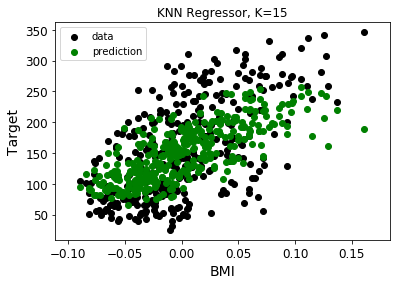

In [7]:
# Visualize prediction vs data for K=15
K = 15
knn_diabetes = KNeighborsRegressor(n_neighbors=K)
knn_predict = cross_val_predict(knn_diabetes, X_train, Y_train)
BMI = X_train["BMI"].copy()
plt.scatter(BMI, Y_train, c='k', label='data')
plt.scatter(BMI, knn_predict, c='g', label='prediction')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('KNN Regressor, K=15')

Text(0.5,1,'KNN Regressor, K=1')

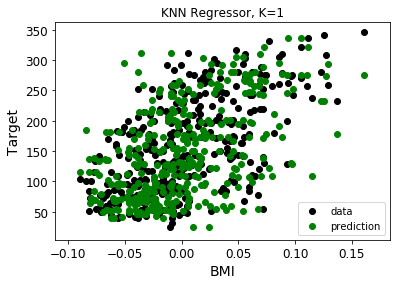

In [8]:
# Visualize prediction vs data for K=1
K = 1
knn_diabetes = KNeighborsRegressor(n_neighbors=K)
knn_predict = cross_val_predict(knn_diabetes, X_train, Y_train)
plt.scatter(BMI, Y_train, c='k', label='data')
plt.scatter(BMI, knn_predict, c='g', label='prediction')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('KNN Regressor, K=1')

In [9]:
# Average RMSE for KNN Regressor with K =15 for Test Data
K = 15
knn_diabetes = KNeighborsRegressor(n_neighbors=K)
#Predict target values based on test data
knn_diabetes.fit(X_train, Y_train)
n15_predict = knn_diabetes.predict(X_test)
rmse_scores = np.sqrt(mean_squared_error(Y_test, n15_predict))
display_scores(rmse_scores)

Scores: 55.51343282009015
Mean: 55.51343282009015
Standard deviation: 0.0


In [10]:
from sklearn.model_selection import GridSearchCV

# define weight options: 'uniform' is equally weighted and 'distance' takes closer points more heavy
weight_options = ['uniform', 'distance']
# define the parameter values that should be searched
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=weight_options)
# define Regressor
knn_grid = KNeighborsRegressor()

# Train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid = GridSearchCV(knn_grid, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(X_train, Y_train)
print(grid.best_score_)
print(grid.best_params_)


-3439.912828987347
{'n_neighbors': 18, 'weights': 'distance'}


Text(0.5,1,'KNN Regressor, K=18')

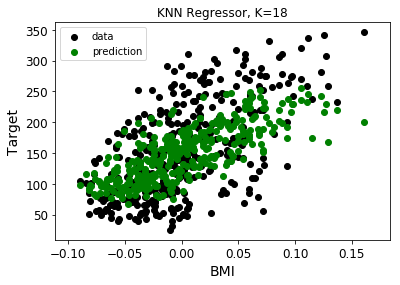

In [11]:
# Visualization using best combination: k=18 and 'distance' weight
knn_diabetes = KNeighborsRegressor(n_neighbors=18, weights = 'distance')
knn_predict = cross_val_predict(knn_diabetes, X_train, Y_train)
BMI = X_train["BMI"].copy()
plt.scatter(BMI, Y_train, c='k', label='data')
plt.scatter(BMI, knn_predict, c='g', label='prediction')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('KNN Regressor, K=18')

In [12]:
# Average RMSE for KNN Regressor with K =18 for Test Data
#Predict target values based on test data
knn_diabetes.fit(X_train, Y_train)
n18_predict = knn_diabetes.predict(X_test)
rmse_scores = np.sqrt(mean_squared_error(Y_test, n18_predict))
display_scores(rmse_scores)

Scores: 54.940864367770416
Mean: 54.940864367770416
Standard deviation: 0.0
